# Preliminary operations

In [1]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import copy
from operator import itemgetter
import math
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
import plotly.express as px
import seaborn
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from google.colab import drive
from datetime import datetime
from datetime import timedelta

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


# Loading data

We got the daily asset prices of the canadian index S&P/TSX60, which includes the top-60 canadian stocks. The initial data, related to the 12th of July, were taken from FactSet ([https://www.factset.com](https://)) manually, one stock at a time. Then, we researched the various changes in the composition of the index over the previous 5 years. In particular, we found specific documents on the following websites: [https://www.newswire.ca/news-releases](https://) and [https://www.spglobal.com/spdji/en/indices/equity/sp-tsx-60-index/#news-research](https://). Finally, we manually checked the stocks added and removed via [https://www.investing.com/equities](https://). 

In this section we load and fix the data in a more readable format.

In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/Financial Markets Analytics/Project_submission/S&PTSX 60 - updated.xlsx')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df = df[2:]
df = df.rename(columns = df.iloc[0])
df = df[1:]
df.reset_index(drop = True, inplace = True)
df = df[:1255]

Let's check the format of the data.

In [6]:
df

,Date,S&P/TSX 60 (189646),CGI Inc. Class A (GIB.A-CA),Nutrien Ltd. (NTR-CA),"Shopify, Inc. Class A (SHOP-CA)",Saputo Inc. (SAP-CA),Power Corporation of Canada (POW-CA),Constellation Software Inc. (CSU-CA),CCL Industries Inc. Class B (CCL.B-CA),TELUS Corporation (T-CA),...,Brookfield Property Partners LP (BPY-UN.TO),BlackBerry Limited (BB-CA),Bombardier Inc. (BBD.B),EnCana Corp (ECA),Husky Energy Inc (HSE),"Magnum Goldcorp, Inc. (MGI-CA)",ARC Resources Ltd. (ARX),Crescent Point Energy Corp (TSX:CPG),Agrium Inc. (AGU),Potash Corporation of Saskatchewan Inc. (POT)
0,2022-07-12 00:00:00,1135.965786,105.88,96.92,42.15,30.14,33.97,1915.0,63.31,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-11 00:00:00,1144.272965,104.34,98.48,42.0,30.03,33.73,1958.8,63.12,28.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-08 00:00:00,1155.662645,106.32,98.83,46.08,29.76,33.84,1993.18,63.19,28.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-07 00:00:00,1157.811018,106.03,99.89,45.83,29.56,33.87,1972.57,62.72,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-06 00:00:00,1140.838671,105.84,96.71,43.06,29.01,33.33,1922.25,60.64,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2017-07-18 00:00:00,893.042902,66.49,NaN,NaN,40.42,29.98,616.1882,61.0,22.29,...,NaN,12.46,58.999996,11.97,14.28,0.35,17.15,9.05,98.32,22.1
1251,2017-07-17 00:00:00,894.084225,66.25,NaN,NaN,40.5,30.25,612.465,61.44,22.365,...,NaN,12.62,58.999996,11.86,14.06,0.35,17.17,9.18,98.45,22.258
1252,2017-07-14 00:00:00,894.793188,66.99,NaN,NaN,40.68,30.36,609.85876,61.45,22.345,...,NaN,12.6,59.249996,11.97,14.06,0.35,17.14,9.22,98.55,22.189
1253,2017-07-13 00:00:00,892.308851,66.94,NaN,NaN,40.59,30.34,614.18695,61.49,22.23,...,NaN,12.58,58.749996,11.76,14.27,0.35,16.9,9.22,97.07,21.981


Let's check the companies and their names.

In [7]:
list(df.columns)

['Date',
 'S&P/TSX 60 (189646)',
 'CGI Inc. Class A (GIB.A-CA)',
 'Nutrien Ltd. (NTR-CA)',
 'Shopify, Inc. Class A (SHOP-CA)',
 'Saputo Inc. (SAP-CA)',
 'Power Corporation of Canada (POW-CA)',
 'Constellation Software Inc. (CSU-CA)',
 'CCL Industries Inc. Class B (CCL.B-CA)',
 'TELUS Corporation (T-CA)',
 'SNC-Lavalin Group Inc. (SNC-CA)',
 'Metro Inc. (MRU-CA)',
 'Loblaw Companies Limited (L-CA)',
 'Intact Financial Corporation (IFC-CA)',
 'Fortis Inc. (FTS-CA)',
 'George Weston Limited (WN-CA)',
 'National Bank of Canada (NA-CA)',
 'First Quantum Minerals Ltd. (FM-CA)',
 'Emera Incorporated (EMA-CA)',
 'Canadian Apartment Properties Real Estate Investment Trust (CAR.UT-CA)',
 'Algonquin Power & Utilities Corp. (AQN-CA)',
 'Dollarama Inc. (DOL-CA)',
 'Pembina Pipeline Corporation (PPL-CA)',
 'Hydro One Limited (H-CA)',
 'Franco-Nevada Corporation (FNV-CA)',
 'Cenovus Energy Inc. (CVE-CA)',
 'FirstService Corp (FSV-CA)',
 'Restaurant Brands International Inc (QSR-CA)',
 'Brookfield Inf

Let's check the length of the index for each day. We should always have 60 companies, i.e. 60 rows with a value different from NaN.

In [8]:
for i in range(len(df)):
  nan = df.loc[[i]].isna().sum().sum()
  not_nan = 73 - nan
  print(str(i) + ' - ' + str(df['Date'][i]) + ' - ' + str(not_nan))

0 - 2022-07-12 00:00:00 - 60
1 - 2022-07-11 00:00:00 - 60
2 - 2022-07-08 00:00:00 - 60
3 - 2022-07-07 00:00:00 - 60
4 - 2022-07-06 00:00:00 - 60
5 - 2022-07-05 00:00:00 - 60
6 - 2022-07-04 00:00:00 - 60
7 - 2022-06-30 00:00:00 - 60
8 - 2022-06-29 00:00:00 - 60
9 - 2022-06-28 00:00:00 - 60
10 - 2022-06-27 00:00:00 - 60
11 - 2022-06-24 00:00:00 - 60
12 - 2022-06-23 00:00:00 - 60
13 - 2022-06-22 00:00:00 - 60
14 - 2022-06-21 00:00:00 - 60
15 - 2022-06-20 00:00:00 - 60
16 - 2022-06-17 00:00:00 - 60
17 - 2022-06-16 00:00:00 - 60
18 - 2022-06-15 00:00:00 - 60
19 - 2022-06-14 00:00:00 - 60
20 - 2022-06-13 00:00:00 - 60
21 - 2022-06-10 00:00:00 - 60
22 - 2022-06-09 00:00:00 - 60
23 - 2022-06-08 00:00:00 - 60
24 - 2022-06-07 00:00:00 - 60
25 - 2022-06-06 00:00:00 - 60
26 - 2022-06-03 00:00:00 - 60
27 - 2022-06-02 00:00:00 - 60
28 - 2022-06-01 00:00:00 - 60
29 - 2022-05-31 00:00:00 - 60
30 - 2022-05-30 00:00:00 - 60
31 - 2022-05-27 00:00:00 - 60
32 - 2022-05-26 00:00:00 - 60
33 - 2022-05-25 00:0

In total, **73 companies** have been included in the index over the 5 years.

Now let's print some useful insights about our data.

In [9]:
print('S&P/TSX 60 (189646)')
print(df['S&P/TSX 60 (189646)'].mean())
print(df['S&P/TSX 60 (189646)'].median())
print(df['S&P/TSX 60 (189646)'].std())

S&P/TSX 60 (189646)
1031.9397419528566
979.944167145653
134.70966621532187


In [10]:
assets_always_in = []
greatest_mean = []
greatest_median = []
greatest_stdev = []
lowest_stdev = []
for i in df.columns[2:]:
  print(i)
  print("Count: " + str(df[i].count()))
  if(df[i].count() == 1255):
    assets_always_in.append(i)
  print("Mean: " + str(df[i].mean()))
  if(df[i].mean() >= 130):
    greatest_mean.append(i)
  print("Median: " + str(df[i].median()))
  if(df[i].median() >= 130):
    greatest_median.append(i)
  print("St. Dev.: " + str(df[i].std()))
  if(df[i].std() >= 30):
    greatest_stdev.append(i)
  if(df[i].std() <= 2.2):
    lowest_stdev.append(i)
  print('\n')

CGI Inc. Class A (GIB.A-CA)
Count: 1255
Mean: 92.75430278884457
Median: 95.09
St. Dev.: 14.64278240386934


Nutrien Ltd. (NTR-CA)
Count: 1137
Mean: 71.35431838170621
Median: 68.4
St. Dev.: 19.12373078032639


Shopify, Inc. Class A (SHOP-CA)
Count: 834
Mean: 105.00575455155867
Median: 109.4905
St. Dev.: 54.85557798346317


Saputo Inc. (SAP-CA)
Count: 1255
Mean: 37.70341832669328
Median: 39.01
St. Dev.: 5.121189199403914


Power Corporation of Canada (POW-CA)
Count: 1255
Mean: 31.571430278884545
Median: 30.46
St. Dev.: 5.558527785884576


Constellation Software Inc. (CSU-CA)
Count: 1255
Mean: 1336.0558816334667
Median: 1238.3335
St. Dev.: 492.1619876626524


CCL Industries Inc. Class B (CCL.B-CA)
Count: 1255
Mean: 59.056996015936264
Median: 59.15
St. Dev.: 7.482107800689083


TELUS Corporation (T-CA)
Count: 1255
Mean: 25.263187250996005
Median: 24.225
St. Dev.: 2.8203555279121417


SNC-Lavalin Group Inc. (SNC-CA)
Count: 1255
Mean: 35.31289243027887
Median: 30.95
St. Dev.: 13.381437492974

Let's print the top-5 assets that, in order:
*   are always in the index.
*   have the highest mean.
*   have the highest median.
*   have the highest st.dev.
*   have the lowest st.dev.


In [11]:
print(assets_always_in)
print(greatest_mean)
print(greatest_median)
print(greatest_stdev)
print(lowest_stdev)

['CGI Inc. Class A (GIB.A-CA)', 'Saputo Inc. (SAP-CA)', 'Power Corporation of Canada (POW-CA)', 'Constellation Software Inc. (CSU-CA)', 'CCL Industries Inc. Class B (CCL.B-CA)', 'TELUS Corporation (T-CA)', 'SNC-Lavalin Group Inc. (SNC-CA)', 'Metro Inc. (MRU-CA)', 'Loblaw Companies Limited (L-CA)', 'Fortis Inc. (FTS-CA)', 'George Weston Limited (WN-CA)', 'National Bank of Canada (NA-CA)', 'First Quantum Minerals Ltd. (FM-CA)', 'Emera Incorporated (EMA-CA)', 'Dollarama Inc. (DOL-CA)', 'Pembina Pipeline Corporation (PPL-CA)', 'Franco-Nevada Corporation (FNV-CA)', 'Cenovus Energy Inc. (CVE-CA)', 'Restaurant Brands International Inc (QSR-CA)', 'Teck Resources Limited Class B (TECK.B-CA)', 'Canadian Tire Corporation, Limited Class A (CTC.A-CA)', 'Kinross Gold Corporation (K-CA)', 'Wheaton Precious Metals Corp (WPM-CA)', 'Suncor Energy Inc. (SU-CA)', 'TC Energy Corporation (TRP-CA)', 'Alimentation Couche-Tard Inc. Class A (ATD-CA)', 'BCE Inc. (BCE-CA)', 'Waste Connections, Inc. (WCN-CA)', 'Ag

In [12]:
sectors = pd.read_excel('/content/gdrive/MyDrive/Financial Markets Analytics/Project_submission/Initial sector composition - S&PTSX 60 .xlsx')

In [13]:
x = np.unique(np.array(sectors['Sector']))
items = list(sectors['Sector'])
count_list = []
perc_list = []
for i in x:
  count_list.append(items.count(i))
  perc_list.append(round(items.count(i)/60 * 100, 2))

In [14]:
perc_list

[13.33, 6.67, 8.33, 10.0, 13.33, 18.33, 1.67, 10.0, 6.67, 3.33, 8.33]

In [15]:
df1 = pd.DataFrame({'Sector': x, '%': perc_list})
df1['x'] = 0

fig = px.bar(df1, x = 'x', y = '%', color = 'Sector', width = 400, height = 500, text_auto = True)

fig.update_xaxes(showticklabels = False, title = '%')
fig.update_yaxes(range = [0, 100], title = None)
fig.update_traces(width = 0.4)
fig.update_layout(
    font = dict(
        size = 10,
        color = "Black")
    )
fig.show()

In [16]:
df1

,Sector,%,x
0,Basic Materials,13.33,0
1,Communication Services,6.67,0
2,Consumer Cyclical,8.33,0
3,Consumer Staples,10.00,0
4,Energy,13.33,0
5,Financial Services,18.33,0
6,Healthcare,1.67,0
7,Industrials,10.00,0
8,Information Technology,6.67,0
9,Real Estate,3.33,0


# Computing risk-free

Let's add a risk-free column, with a value for each day. In particular, we got the daily government bond yields (5 years) from [https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/#graph](https://).

In [17]:
bonds = pd.read_csv('/content/gdrive/MyDrive/Financial Markets Analytics/Project_submission/Bonds 5 years.csv')

In [18]:
bonds = bonds.reindex(index = bonds.index[::-1])
bonds = bonds.reset_index(drop = True)
for i in range(len(bonds)):
  to_time = bonds['date'][i]
  bonds['date'][i] = datetime.strptime(to_time + ' 00:00:00', '%Y-%m-%d %H:%M:%S')
bonds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,5YR
0,2022-07-12 00:00:00,3.10
1,2022-07-11 00:00:00,3.16
2,2022-07-08 00:00:00,3.21
3,2022-07-07 00:00:00,3.12
4,2022-07-06 00:00:00,3.06
...,...,...
1244,2017-07-18 00:00:00,1.48
1245,2017-07-17 00:00:00,1.50
1246,2017-07-14 00:00:00,1.51
1247,2017-07-13 00:00:00,1.54


In [19]:
for i in range(len(df)):
  trovato = False
  for j in range(len(bonds)):
    if(str(bonds['date'][j].date()) == str(df['Date'][i].date())):
      trovato = True
  if(trovato == False):
    print(df['Date'][i].date())
    df = df.drop(i)

2021-11-11
2021-09-30
2020-11-11
2019-11-11
2018-11-12
2017-11-13


In [20]:
df.reset_index(drop = True, inplace = True)
df

,Date,S&P/TSX 60 (189646),CGI Inc. Class A (GIB.A-CA),Nutrien Ltd. (NTR-CA),"Shopify, Inc. Class A (SHOP-CA)",Saputo Inc. (SAP-CA),Power Corporation of Canada (POW-CA),Constellation Software Inc. (CSU-CA),CCL Industries Inc. Class B (CCL.B-CA),TELUS Corporation (T-CA),...,Brookfield Property Partners LP (BPY-UN.TO),BlackBerry Limited (BB-CA),Bombardier Inc. (BBD.B),EnCana Corp (ECA),Husky Energy Inc (HSE),"Magnum Goldcorp, Inc. (MGI-CA)",ARC Resources Ltd. (ARX),Crescent Point Energy Corp (TSX:CPG),Agrium Inc. (AGU),Potash Corporation of Saskatchewan Inc. (POT)
0,2022-07-12 00:00:00,1135.965786,105.88,96.92,42.15,30.14,33.97,1915.0,63.31,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-11 00:00:00,1144.272965,104.34,98.48,42.0,30.03,33.73,1958.8,63.12,28.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-08 00:00:00,1155.662645,106.32,98.83,46.08,29.76,33.84,1993.18,63.19,28.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-07 00:00:00,1157.811018,106.03,99.89,45.83,29.56,33.87,1972.57,62.72,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-06 00:00:00,1140.838671,105.84,96.71,43.06,29.01,33.33,1922.25,60.64,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2017-07-18 00:00:00,893.042902,66.49,NaN,NaN,40.42,29.98,616.1882,61.0,22.29,...,NaN,12.46,58.999996,11.97,14.28,0.35,17.15,9.05,98.32,22.1
1245,2017-07-17 00:00:00,894.084225,66.25,NaN,NaN,40.5,30.25,612.465,61.44,22.365,...,NaN,12.62,58.999996,11.86,14.06,0.35,17.17,9.18,98.45,22.258
1246,2017-07-14 00:00:00,894.793188,66.99,NaN,NaN,40.68,30.36,609.85876,61.45,22.345,...,NaN,12.6,59.249996,11.97,14.06,0.35,17.14,9.22,98.55,22.189
1247,2017-07-13 00:00:00,892.308851,66.94,NaN,NaN,40.59,30.34,614.18695,61.49,22.23,...,NaN,12.58,58.749996,11.76,14.27,0.35,16.9,9.22,97.07,21.981


There were a few data missing from the bonds dataset due to some national holiday. So, we deleted these six values from the main dataset.

In [21]:
risk_free_col = []
for i in range(len(bonds)):
  j = int(bonds['date'][i].month)
  k = int(bonds['date'][i].year)
  risk_free_col.append(bonds['5YR'][i]/100)
df['risk-free'] = risk_free_col   

In [22]:
df

,Date,S&P/TSX 60 (189646),CGI Inc. Class A (GIB.A-CA),Nutrien Ltd. (NTR-CA),"Shopify, Inc. Class A (SHOP-CA)",Saputo Inc. (SAP-CA),Power Corporation of Canada (POW-CA),Constellation Software Inc. (CSU-CA),CCL Industries Inc. Class B (CCL.B-CA),TELUS Corporation (T-CA),...,BlackBerry Limited (BB-CA),Bombardier Inc. (BBD.B),EnCana Corp (ECA),Husky Energy Inc (HSE),"Magnum Goldcorp, Inc. (MGI-CA)",ARC Resources Ltd. (ARX),Crescent Point Energy Corp (TSX:CPG),Agrium Inc. (AGU),Potash Corporation of Saskatchewan Inc. (POT),risk-free
0,2022-07-12 00:00:00,1135.965786,105.88,96.92,42.15,30.14,33.97,1915.0,63.31,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0310
1,2022-07-11 00:00:00,1144.272965,104.34,98.48,42.0,30.03,33.73,1958.8,63.12,28.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0316
2,2022-07-08 00:00:00,1155.662645,106.32,98.83,46.08,29.76,33.84,1993.18,63.19,28.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0321
3,2022-07-07 00:00:00,1157.811018,106.03,99.89,45.83,29.56,33.87,1972.57,62.72,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0312
4,2022-07-06 00:00:00,1140.838671,105.84,96.71,43.06,29.01,33.33,1922.25,60.64,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2017-07-18 00:00:00,893.042902,66.49,NaN,NaN,40.42,29.98,616.1882,61.0,22.29,...,12.46,58.999996,11.97,14.28,0.35,17.15,9.05,98.32,22.1,0.0148
1245,2017-07-17 00:00:00,894.084225,66.25,NaN,NaN,40.5,30.25,612.465,61.44,22.365,...,12.62,58.999996,11.86,14.06,0.35,17.17,9.18,98.45,22.258,0.0150
1246,2017-07-14 00:00:00,894.793188,66.99,NaN,NaN,40.68,30.36,609.85876,61.45,22.345,...,12.6,59.249996,11.97,14.06,0.35,17.14,9.22,98.55,22.189,0.0151
1247,2017-07-13 00:00:00,892.308851,66.94,NaN,NaN,40.59,30.34,614.18695,61.49,22.23,...,12.58,58.749996,11.76,14.27,0.35,16.9,9.22,97.07,21.981,0.0154


Now we have one more column which indicates the risk-free rate for each day.

# Computing log-returns 

We add a column of log-returns for each equity (the final dataset will have one row less). 

In [23]:
df_log_Returns = pd.DataFrame()

j = 0
for col in df.columns[1:75]:
  newCol = []
  for i in range(len(df) - 1):
    newCol.append(np.log(df[col][i]) - np.log(df[col][i+1]))

  # We add a null value to make newCol of the same length of the dataframe 
  newCol.append(0)  
  df['log-return: ' + col] = newCol
  df_log_Returns['log-return: ' + col] = newCol   

Now, we delete the last row of the dataframe.

In [24]:
df_log_Returns

,log-return: S&P/TSX 60 (189646),log-return: CGI Inc. Class A (GIB.A-CA),log-return: Nutrien Ltd. (NTR-CA),"log-return: Shopify, Inc. Class A (SHOP-CA)",log-return: Saputo Inc. (SAP-CA),log-return: Power Corporation of Canada (POW-CA),log-return: Constellation Software Inc. (CSU-CA),log-return: CCL Industries Inc. Class B (CCL.B-CA),log-return: TELUS Corporation (T-CA),log-return: SNC-Lavalin Group Inc. (SNC-CA),...,log-return: Brookfield Property Partners LP (BPY-UN.TO),log-return: BlackBerry Limited (BB-CA),log-return: Bombardier Inc. (BBD.B),log-return: EnCana Corp (ECA),log-return: Husky Energy Inc (HSE),"log-return: Magnum Goldcorp, Inc. (MGI-CA)",log-return: ARC Resources Ltd. (ARX),log-return: Crescent Point Energy Corp (TSX:CPG),log-return: Agrium Inc. (AGU),log-return: Potash Corporation of Saskatchewan Inc. (POT)
0,-0.007286,0.014652,-0.015968,0.003565,0.003656,0.007090,-0.022614,0.003006,-0.005536,-0.007121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009904,-0.018799,-0.003548,-0.092709,0.009032,-0.003256,-0.017399,-0.001108,0.006578,-0.020194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.001857,0.002731,-0.010668,0.005440,0.006743,-0.000886,0.010394,0.007466,-0.004505,0.003047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.014768,0.001794,0.032353,0.062344,0.018781,0.016072,0.025841,0.033726,0.000000,0.051431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.005783,0.026229,-0.006801,-0.029744,-0.016071,0.000000,-0.006730,-0.015545,0.002423,-0.002292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,-0.001165,0.003616,NaN,NaN,-0.001977,-0.008966,0.006061,-0.007187,-0.003359,-0.006717,...,NaN,-0.012759,0.000000,0.009232,0.015526,0.000000,-0.001166,-0.014262,-0.001321,-0.007124
1245,-0.000793,-0.011108,NaN,NaN,-0.004435,-0.003630,0.004264,-0.000163,0.000895,-0.022301,...,NaN,0.001586,-0.004228,-0.009232,0.000000,0.000000,0.001749,-0.004348,-0.001015,0.003105
1246,0.002780,0.000747,NaN,NaN,0.002215,0.000659,-0.007072,-0.000651,0.005160,0.012832,...,NaN,0.001589,0.008475,0.017700,-0.014826,0.000000,0.014101,0.000000,0.015132,0.009418
1247,0.000142,0.004792,NaN,NaN,0.005930,0.000989,0.003264,-0.003409,-0.007395,-0.001569,...,NaN,-0.002382,0.004264,0.009398,0.001403,-0.133531,0.004745,0.005438,0.016830,0.019107


In [25]:
df.drop(1248, inplace = True)
df_log_Returns.drop(1248, inplace = True)

We now create a dataset with the weekly log return, that will be usefull in order to compute the annual estimation of volatility and return of portfolios

In [26]:
df_log_Returns_weekly = pd.DataFrame()

j = 0
for col in df.columns[1:75]:
  newCol = []
  date_col = []
  for i in range(3, len(df) - 7, 7):
    date_col.append(df['Date'][i])
    newCol.append(np.log(df[col][i]) - np.log(df[col][i+7]))

  df_log_Returns_weekly[col] = newCol   
df_log_Returns_weekly['Date'] = date_col  

In [27]:
df_log_Returns_weekly

,S&P/TSX 60 (189646),CGI Inc. Class A (GIB.A-CA),Nutrien Ltd. (NTR-CA),"Shopify, Inc. Class A (SHOP-CA)",Saputo Inc. (SAP-CA),Power Corporation of Canada (POW-CA),Constellation Software Inc. (CSU-CA),CCL Industries Inc. Class B (CCL.B-CA),TELUS Corporation (T-CA),SNC-Lavalin Group Inc. (SNC-CA),...,BlackBerry Limited (BB-CA),Bombardier Inc. (BBD.B),EnCana Corp (ECA),Husky Energy Inc (HSE),"Magnum Goldcorp, Inc. (MGI-CA)",ARC Resources Ltd. (ARX),Crescent Point Energy Corp (TSX:CPG),Agrium Inc. (AGU),Potash Corporation of Saskatchewan Inc. (POT),Date
0,-0.010068,0.024537,-0.076301,-0.047719,0.032316,-0.005007,0.013505,0.042171,-0.004485,0.011399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-07
1,0.015590,0.075983,-0.022561,0.197548,0.053466,0.031938,0.069020,0.031078,0.050478,0.037283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-27
2,-0.092686,-0.101934,-0.016459,-0.188815,0.041390,-0.112071,-0.052216,-0.029414,-0.142497,-0.136274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-16
3,0.006240,-0.021983,-0.081099,0.015225,0.024894,0.004076,-0.028533,-0.007468,0.011367,-0.031449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-07
4,0.011640,0.034016,-0.093986,-0.017363,-0.044298,0.039711,0.006103,-0.022561,-0.008223,0.006990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-0.006461,0.003165,NaN,NaN,-0.006594,-0.032531,-0.006466,-0.055711,-0.031284,-0.008876,...,-0.029322,-0.012371,0.006999,-0.004144,0.223144,0.038253,0.013261,0.055536,0.020061,2017-09-11
173,0.008998,0.004606,NaN,NaN,-0.002345,0.009747,-0.026574,-0.008172,0.009574,0.052922,...,0.056746,-0.074986,0.010591,0.024417,0.133531,0.000629,-0.012063,-0.007395,-0.004128,2017-08-30
174,-0.009588,0.001753,NaN,NaN,0.002110,0.000327,0.029217,0.047037,-0.018837,-0.023404,...,-0.029226,0.023078,-0.079292,-0.023728,0.000000,-0.018086,-0.077272,-0.007239,-0.018618,2017-08-21
175,-0.001894,-0.048714,NaN,NaN,0.008248,0.009846,0.018250,-0.060342,0.011482,-0.040321,...,-0.050888,0.023623,-0.028285,0.004839,0.000000,-0.060552,-0.084047,-0.016722,-0.003130,2017-08-10


# Rolling regression

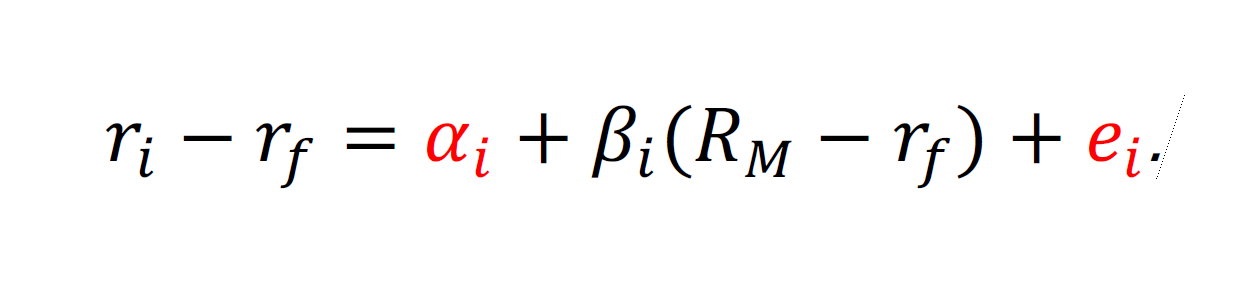

For each stock:
*   r_i: log-returns for stock i (already computed).
*   r_f: risk-free rate (already computed).
*   alpha_i: excess returns (intercept of the regression).
*   beta_i: coefficient of the regression.
*   R_M: log-returns of the market (already computed).
*   e_i: specific risk of the stock.



We implement a rolling regression for each stock of the dataset. The rolling window has to be 180 days wide, so we exclude from our analysis the stocks that don't have a sufficient number of observation.

In [28]:
colNotUseful = []

for col in df.columns[1:]:
  notNan = len(df)-df[col].isna().sum()
  if notNan <= 187:
    colNotUseful.append(col)

In [29]:
colNotUseful

['Intact Financial Corporation (IFC-CA)',
 'Hydro One Limited (H-CA)',
 'Agrium Inc. (AGU)',
 'Potash Corporation of Saskatchewan Inc. (POT)',
 'log-return: Intact Financial Corporation (IFC-CA)',
 'log-return: Hydro One Limited (H-CA)',
 'log-return: Agrium Inc. (AGU)',
 'log-return: Potash Corporation of Saskatchewan Inc. (POT)']

In [30]:
df_final = df.drop(colNotUseful, axis = 1)
df_final

,Date,S&P/TSX 60 (189646),CGI Inc. Class A (GIB.A-CA),Nutrien Ltd. (NTR-CA),"Shopify, Inc. Class A (SHOP-CA)",Saputo Inc. (SAP-CA),Power Corporation of Canada (POW-CA),Constellation Software Inc. (CSU-CA),CCL Industries Inc. Class B (CCL.B-CA),TELUS Corporation (T-CA),...,log-return: Kirkland Lake Gold Ltd (KL),log-return: Inter Pipeline Ltd (TSX:IPL),log-return: Brookfield Property Partners LP (BPY-UN.TO),log-return: BlackBerry Limited (BB-CA),log-return: Bombardier Inc. (BBD.B),log-return: EnCana Corp (ECA),log-return: Husky Energy Inc (HSE),"log-return: Magnum Goldcorp, Inc. (MGI-CA)",log-return: ARC Resources Ltd. (ARX),log-return: Crescent Point Energy Corp (TSX:CPG)
0,2022-07-12 00:00:00,1135.965786,105.88,96.92,42.15,30.14,33.97,1915.0,63.31,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-11 00:00:00,1144.272965,104.34,98.48,42.0,30.03,33.73,1958.8,63.12,28.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-08 00:00:00,1155.662645,106.32,98.83,46.08,29.76,33.84,1993.18,63.19,28.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-07 00:00:00,1157.811018,106.03,99.89,45.83,29.56,33.87,1972.57,62.72,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-06 00:00:00,1140.838671,105.84,96.71,43.06,29.01,33.33,1922.25,60.64,28.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2017-07-19 00:00:00,898.566611,65.76,NaN,NaN,42.42,30.12,618.54315,60.77,22.44,...,NaN,0.009184,NaN,0.025358,0.000000,0.045722,0.034415,-0.154151,0.037762,0.082674
1244,2017-07-18 00:00:00,893.042902,66.49,NaN,NaN,40.42,29.98,616.1882,61.0,22.29,...,NaN,0.000803,NaN,-0.012759,0.000000,0.009232,0.015526,0.000000,-0.001166,-0.014262
1245,2017-07-17 00:00:00,894.084225,66.25,NaN,NaN,40.5,30.25,612.465,61.44,22.365,...,NaN,-0.004406,NaN,0.001586,-0.004228,-0.009232,0.000000,0.000000,0.001749,-0.004348
1246,2017-07-14 00:00:00,894.793188,66.99,NaN,NaN,40.68,30.36,609.85876,61.45,22.345,...,NaN,0.014899,NaN,0.001589,0.008475,0.017700,-0.014826,0.000000,0.014101,0.000000


In [31]:
df_log_Returns.drop(colNotUseful[4:], axis = 1, inplace = True)
df_log_Returns

,log-return: S&P/TSX 60 (189646),log-return: CGI Inc. Class A (GIB.A-CA),log-return: Nutrien Ltd. (NTR-CA),"log-return: Shopify, Inc. Class A (SHOP-CA)",log-return: Saputo Inc. (SAP-CA),log-return: Power Corporation of Canada (POW-CA),log-return: Constellation Software Inc. (CSU-CA),log-return: CCL Industries Inc. Class B (CCL.B-CA),log-return: TELUS Corporation (T-CA),log-return: SNC-Lavalin Group Inc. (SNC-CA),...,log-return: Kirkland Lake Gold Ltd (KL),log-return: Inter Pipeline Ltd (TSX:IPL),log-return: Brookfield Property Partners LP (BPY-UN.TO),log-return: BlackBerry Limited (BB-CA),log-return: Bombardier Inc. (BBD.B),log-return: EnCana Corp (ECA),log-return: Husky Energy Inc (HSE),"log-return: Magnum Goldcorp, Inc. (MGI-CA)",log-return: ARC Resources Ltd. (ARX),log-return: Crescent Point Energy Corp (TSX:CPG)
0,-0.007286,0.014652,-0.015968,0.003565,0.003656,0.007090,-0.022614,0.003006,-0.005536,-0.007121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009904,-0.018799,-0.003548,-0.092709,0.009032,-0.003256,-0.017399,-0.001108,0.006578,-0.020194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.001857,0.002731,-0.010668,0.005440,0.006743,-0.000886,0.010394,0.007466,-0.004505,0.003047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.014768,0.001794,0.032353,0.062344,0.018781,0.016072,0.025841,0.033726,0.000000,0.051431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.005783,0.026229,-0.006801,-0.029744,-0.016071,0.000000,-0.006730,-0.015545,0.002423,-0.002292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.006166,-0.011040,NaN,NaN,0.048295,0.004659,0.003815,-0.003778,0.006707,0.004424,...,NaN,0.009184,NaN,0.025358,0.000000,0.045722,0.034415,-0.154151,0.037762,0.082674
1244,-0.001165,0.003616,NaN,NaN,-0.001977,-0.008966,0.006061,-0.007187,-0.003359,-0.006717,...,NaN,0.000803,NaN,-0.012759,0.000000,0.009232,0.015526,0.000000,-0.001166,-0.014262
1245,-0.000793,-0.011108,NaN,NaN,-0.004435,-0.003630,0.004264,-0.000163,0.000895,-0.022301,...,NaN,-0.004406,NaN,0.001586,-0.004228,-0.009232,0.000000,0.000000,0.001749,-0.004348
1246,0.002780,0.000747,NaN,NaN,0.002215,0.000659,-0.007072,-0.000651,0.005160,0.012832,...,NaN,0.014899,NaN,0.001589,0.008475,0.017700,-0.014826,0.000000,0.014101,0.000000


We adjust the log-returns for the risk-free rate.

In [32]:
df_regression = df_log_Returns.apply(lambda col: col-df_final['risk-free'], axis = 0)
df_regression

,log-return: S&P/TSX 60 (189646),log-return: CGI Inc. Class A (GIB.A-CA),log-return: Nutrien Ltd. (NTR-CA),"log-return: Shopify, Inc. Class A (SHOP-CA)",log-return: Saputo Inc. (SAP-CA),log-return: Power Corporation of Canada (POW-CA),log-return: Constellation Software Inc. (CSU-CA),log-return: CCL Industries Inc. Class B (CCL.B-CA),log-return: TELUS Corporation (T-CA),log-return: SNC-Lavalin Group Inc. (SNC-CA),...,log-return: Kirkland Lake Gold Ltd (KL),log-return: Inter Pipeline Ltd (TSX:IPL),log-return: Brookfield Property Partners LP (BPY-UN.TO),log-return: BlackBerry Limited (BB-CA),log-return: Bombardier Inc. (BBD.B),log-return: EnCana Corp (ECA),log-return: Husky Energy Inc (HSE),"log-return: Magnum Goldcorp, Inc. (MGI-CA)",log-return: ARC Resources Ltd. (ARX),log-return: Crescent Point Energy Corp (TSX:CPG)
0,-0.038286,-0.016348,-0.046968,-0.027435,-0.027344,-0.023910,-0.053614,-0.027994,-0.036536,-0.038121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.041504,-0.050399,-0.035148,-0.124309,-0.022568,-0.034856,-0.048999,-0.032708,-0.025022,-0.051794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.033957,-0.029369,-0.042768,-0.026660,-0.025357,-0.032986,-0.021706,-0.024634,-0.036605,-0.029053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.016432,-0.029406,0.001153,0.031144,-0.012419,-0.015128,-0.005359,0.002526,-0.031200,0.020231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.036383,-0.004371,-0.037401,-0.060344,-0.046671,-0.030600,-0.037330,-0.046145,-0.028177,-0.032892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,-0.009034,-0.026240,NaN,NaN,0.033095,-0.010541,-0.011385,-0.018978,-0.008493,-0.010776,...,NaN,-0.006016,NaN,0.010158,-0.015200,0.030522,0.019215,-0.169351,0.022562,0.067474
1244,-0.015965,-0.011184,NaN,NaN,-0.016777,-0.023766,-0.008739,-0.021987,-0.018159,-0.021517,...,NaN,-0.013997,NaN,-0.027559,-0.014800,-0.005568,0.000726,-0.014800,-0.015966,-0.029062
1245,-0.015793,-0.026108,NaN,NaN,-0.019435,-0.018630,-0.010736,-0.015163,-0.014105,-0.037301,...,NaN,-0.019406,NaN,-0.013414,-0.019228,-0.024232,-0.015000,-0.015000,-0.013251,-0.019348
1246,-0.012320,-0.014353,NaN,NaN,-0.012885,-0.014441,-0.022172,-0.015751,-0.009940,-0.002268,...,NaN,-0.000201,NaN,-0.013511,-0.006625,0.002600,-0.029926,-0.015100,-0.000999,-0.015100


In [33]:
def OLS_regression(x, y):
  X = sm.add_constant(x)
  model = sm.OLS(y, X, missing = 'drop')
  results = model.fit()
  return results

In [34]:
def rolling_regression(x, y, window_size, step_length, date = [], reverse = True):
  warnings.filterwarnings('ignore')

  # reverse = True, the order of data is reversed 
  # reverse = False, the order of data is mantained

  if reverse:
    x = x[len(x)::-1].reset_index(drop = True)
    y = y[len(y)::-1].reset_index(drop = True)
    date = date[len(date)::-1].reset_index(drop = True)
  # Compute the maximum number of iterations with respect to window_size and step_length
  max_iteration = int((len(x) - window_size)/(step_length)) + 1

  # Initialization of the vector that will contain all the information about each regression
  if list(date) == []:
    rolling_results = list()
  else:
    rolling_results = dict()

  # Regression
  for i in range(max_iteration):
    start = i*step_length
    end = i*step_length + window_size

    if y[start:end+step_length+1].isna().sum() > 0:
      continue;

    results = OLS_regression(x[start:end], y[start:end])
  
    if list(date) == []:
      rolling_results.append(results)
    else:
      key = str(date[end])
      rolling_results[key] = results
  
  return rolling_results

The regressor (x) for each asset is the vector of market's return.

In [35]:
x = df_regression.iloc[:,0]

Now we iterate over all the assets, storing the results in a dictionary. 

In [36]:
assets_results = dict()

for i in range(1, len(df_regression.columns)):
  col = df_regression.columns[i]
  y = df_regression.iloc[:,i]

  assets_results[col[12:]] = rolling_regression(x, y, 180, 7, df_final['Date'], True)

For each asset and for each date an OLSResults object is stored. The attributes associated can be seen at: [https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults](https://).

Let's see the weeks of permanence of each asset in the index.

In [37]:
for el in assets_results:
  print(el + ': ' + str(len(assets_results[el])))

CGI Inc. Class A (GIB.A-CA): 153
Nutrien Ltd. (NTR-CA): 136
Shopify, Inc. Class A (SHOP-CA): 93
Saputo Inc. (SAP-CA): 153
Power Corporation of Canada (POW-CA): 153
Constellation Software Inc. (CSU-CA): 153
CCL Industries Inc. Class B (CCL.B-CA): 153
TELUS Corporation (T-CA): 153
SNC-Lavalin Group Inc. (SNC-CA): 153
Metro Inc. (MRU-CA): 153
Loblaw Companies Limited (L-CA): 153
Fortis Inc. (FTS-CA): 153
George Weston Limited (WN-CA): 153
National Bank of Canada (NA-CA): 153
First Quantum Minerals Ltd. (FM-CA): 153
Emera Incorporated (EMA-CA): 153
Canadian Apartment Properties Real Estate Investment Trust (CAR.UT-CA): 47
Algonquin Power & Utilities Corp. (AQN-CA): 47
Dollarama Inc. (DOL-CA): 153
Pembina Pipeline Corporation (PPL-CA): 153
Franco-Nevada Corporation (FNV-CA): 153
Cenovus Energy Inc. (CVE-CA): 153
FirstService Corp (FSV-CA): 3
Restaurant Brands International Inc (QSR-CA): 153
Brookfield Infrastructure Partners L.P. (BIP.UT-CA): 93
Teck Resources Limited Class B (TECK.B-CA): 1

An example.

In [38]:
assets_results['ARC Resources Ltd. (ARX)']['2018-04-04 00:00:00'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     log-return: ARC Resources Ltd. (ARX)   R-squared:                       0.149
Model:                                              OLS   Adj. R-squared:                  0.144
Method:                                   Least Squares   F-statistic:                     31.17
Date:                                  Fri, 22 Jul 2022   Prob (F-statistic):           8.68e-08
Time:                                          23:47:34   Log-Likelihood:                 454.92
No. Observations:                                   180   AIC:                            -905.8
Df Residuals:                                       178   BIC:                            -899.5
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0080      0.005      1.484      0.140      -0.003       0.019
log-return: S&P/TSX 60 (189646)     1.4508      0.260      5.583      0.000       0.938       1.964
==============================================================================
Omnibus:                       18.279   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.223
Skew:                          -0.472   Prob(JB):                     1.36e-08
Kurtosis:                       4.985   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we could build weekly portfolios based on:
*   R squared.
*   Total risk.
*   Systematic risk.
*   Specific risk.
*   Alpha coefficient.
*   Beta coefficient.
*   Momentum.
*   Any combination of them.

# Selecting parameters

Let's create many dictionaries as the number of parameters to be tested. We will select some assets for each dictionary in order to build specific portfolios.

*   R-squared
*   Alpha
*   Beta

In [39]:
date_list = list(assets_results['National Bank of Canada (NA-CA)'].keys())
r_squared_dict = {}
alpha_dict = {}
beta_dict = {}
for i in date_list:
  r_squared_dict[i] = {}
  alpha_dict[i] = {}
  beta_dict[i] = {}
  for el in assets_results:
    if(i in assets_results[el]):
      r_squared_dict[i][el] = assets_results[el][i].rsquared
      alpha_dict[i][el] = assets_results[el][i].params[0]
      beta_dict[i][el] = assets_results[el][i].params[1] 

*   Stock returns
*   Systematic risk
*   Specific risk
*   Total risk

In [40]:
date_list = list(assets_results['National Bank of Canada (NA-CA)'].keys())
date_list_2 = df_final.reindex(index = df_final.index[::-1]) 
date_list_2.reset_index(inplace = True, drop = True)
df_regression_2 = df_regression.reindex(index = df_regression.index[::-1]) 
df_regression_2.reset_index(inplace = True, drop = True)
market_r = df_regression_2['log-return: S&P/TSX 60 (189646)']
df_regression_2.drop('log-return: S&P/TSX 60 (189646)', axis = 1, inplace = True)
df_final_2 = df_final.reindex(index = df_final.index[::-1]) 
df_final_2.reset_index(inplace = True, drop = True)
index_list = []
for i in date_list:
  for j in range(len(date_list_2)):
    if(str(date_list_2['Date'][j]) == i):
      index_list.append(j)
systematic_risk_dict = {}
specific_risk_dict = {}
total_risk_dict = {}
momentum_dict = {}
for i in date_list:
  systematic_risk_dict[i] = {}
  specific_risk_dict[i] = {}
  total_risk_dict[i] = {}
  momentum_dict[i] = {}
  for j in index_list:
    if(str(date_list_2['Date'][j]) == i):
      row = j
  for el in assets_results:
    if(i in assets_results[el]):
      col = 'log-return: ' + el
      momentum_dict[i][el] = np.log(df_final_2[el][row]) - np.log(df_final_2[el][row-180]) 
      specific_risk_dict[i][el] = df_regression_2[col][row-180:row].var()
      systematic_risk_dict[i][el] = (market_r[row-180:row].var())*(assets_results[el][i].params[1]**2)
      total_risk_dict[i][el] = specific_risk_dict[i][el] + systematic_risk_dict[i][el]

Each portfolio will be a dictionary with:

*   Keys: dates.
*   Values: a list with tot couples representing the parameter of the stocks (e.g. r-squared, alpha) and their value.



# Portfolios construction

In [41]:
def build_portfolios(dict_param, alpha = False):  
  date_list = list(assets_results['National Bank of Canada (NA-CA)'].keys())
  portfolio = {}
  for i in date_list:
    ordered_list = (sorted(dict_param[i].items(), key = lambda x: x[1], reverse = True))
    values = []
    for j in range(len(ordered_list)):
      values.append(ordered_list[j][1])
    values.sort(reverse = True)
    perc_80 = np.percentile(values, 80)
    perc_list = []
    for j in range(len(ordered_list)):
      if(ordered_list[j][1] >= perc_80):
        perc_list.append(ordered_list[j])
    
    # If the parameter is alpha we have to verify its significativity
    if(alpha == True):
      to_pop = []
      for t in perc_list:
        if float(assets_results[t[0]][i].t_test('const=0').summary_frame()['P>|t|']) > 0.05:
          to_pop.append(t)
      for el in to_pop:
        perc_list.remove(el)
        
    portfolio[i] = perc_list
  return portfolio

## Basic

We define a dictionary that will contains all the portofolios constructed.

In [42]:
portfolios = dict()

Firstly, we get a portfolio with the upper 20-percentile for each parameter.

In [43]:
portfolios['r_squared'] = build_portfolios(r_squared_dict)

In [44]:
portfolios['alpha'] = build_portfolios(alpha_dict, alpha = True)

In [45]:
portfolios['beta'] = build_portfolios(beta_dict)

In [46]:
portfolios['systematic_risk'] = build_portfolios(systematic_risk_dict)

In [47]:
portfolios['specific_risk'] = build_portfolios(specific_risk_dict)

In [48]:
portfolios['total_risk'] = build_portfolios(total_risk_dict)

In [49]:
portfolios['momentum'] = build_portfolios(momentum_dict)

We add the portfolio to invest only in the market index every week.

In [50]:
d = dict()

for key in portfolios['momentum'].keys():
  d[key] = [('S&P/TSX 60 (189646)', 0)]

portfolios['S&P/TSX 60 (189646)'] = d

## More

Now we build three more portfolios:
*   R-squared without considering the risk-free.
*   Ratio alpha/returns.
*   The product between R-squared and beta.


In [51]:
x = df_log_Returns.iloc[:,0]
assets_results_not_rm = dict()

for i in range(1, len(df_regression.columns)):
  col = df_log_Returns.columns[i]
  y = df_log_Returns.iloc[:,i]

  assets_results_not_rm[col[12:]] = rolling_regression(x, y, 180, 7, df_final['Date'], True)

In [52]:
date_list = list(assets_results_not_rm['National Bank of Canada (NA-CA)'].keys())
r_squared_dict_not_rm = {}
for i in date_list:
  r_squared_dict_not_rm[i] = {}
  for el in assets_results_not_rm:
    if(i in assets_results_not_rm[el]):
      r_squared_dict_not_rm[i][el] = assets_results_not_rm[el][i].rsquared

In [53]:
portfolios['r_squared_not_rm'] = build_portfolios(r_squared_dict_not_rm)

In [54]:
ratio_alpha_ret_dict = {}
for i in date_list:
  ratio_alpha_ret_dict[i] = {key: alpha_dict[i][key]/momentum_dict[i].get(key, 0) for key in alpha_dict[i]}

In [55]:
portfolios['ratio_alpha_ret'] = build_portfolios(ratio_alpha_ret_dict)

In [56]:
r_squared_beta_dict = {}
beta_2_dict = copy.deepcopy(beta_dict)
for i in date_list:
  for j in beta_2_dict[i]:
    if beta_2_dict[i][j] < 1:
      beta_2_dict[i][j] = beta_2_dict[i][j]*-1
for i in date_list:
  r_squared_beta_dict[i] = {key: r_squared_dict[i][key]*beta_2_dict[i].get(key, 0) for key in r_squared_dict[i]}

In [57]:
portfolios['r_squared_beta'] = build_portfolios(r_squared_beta_dict)

# Portfolios evaluation

## Portfolios returns

We want to compute the annual return for each portfolio. In order to do it, we will determine the weekly return of each portfolio and then we'll approximate the annual return as:

$$R_A = mean(R_W × 2)$$

In [58]:
initial_capital = 100

The function *window_daily_log_returns* returns a dictionary with:
- Keys: the name of the assets of input;
- Values: the values of log-returns between the initial date and the final date, corresponding to the input indexes.

In [59]:
def window_daily_log_returns(assets, initial_date_index, end_date_index):
  log_returns = dict()

  for asset in assets:
    log_ret = df_log_Returns['log-return: ' + asset][len(df_log_Returns['log-return: ' + asset])::-1].reset_index(drop = True)
    log_returns[asset] = log_ret[initial_date_index:end_date_index].reset_index(drop = True)
  return log_returns

The function *portfolio_daily_log_returns* returns a dictionary with:
- Keys: the dates in which money are invested in the input portfolio;
- Values: the log-returns of the portfolio.

In particular, log-returns of a portfolio with *n* assets is computed as:
$$ \tau_{p,t} = ln(∑_{i=1}^{n} w_{i}e^{\tau_{i,t}}) $$

where:
- $w_{i}$, is the weight of the i-th asset;
- $\tau_{i,t}$, is the log return of asset *i* at time *t*.

In [60]:
def portfolio_daily_return(portfolios, date, window_size, step_length, reverse = True):
  daily_portfolio_return = dict()

  # reverse = True, the order of data is reversed 
  # reverse = False, the order of data is mantained

  if reverse:
    date = date[len(date)::-1].reset_index(drop = True)

  for i in range(len(portfolios.keys())):
    initial_date_index = window_size+step_length*i
    end_date_index = window_size+step_length*i+step_length
    
    #print(initial_date_index, end_date_index)

    initial_date = date[initial_date_index]

    portfolio = portfolios[str(initial_date)]
    
    portfolio_assets = list(map(lambda x: x[0], portfolio))

    # Compute the weight of each asset
    for asset in portfolio_assets:
      log_ret = df_log_Returns['log-return: ' + asset][len(df_log_Returns['log-return: ' + asset])::-1].reset_index(drop = True)
      log_ret_2 = log_ret[initial_date_index:end_date_index].reset_index(drop = True)
      if(log_ret_2.isnull().sum() != 0):
        portfolio_assets.remove(asset)
    num_assets = len(portfolio_assets)
    
    if num_assets != 0:
      weight = 1/num_assets

      # Retrieve log returns of each asset
      assets_log_return = window_daily_log_returns(portfolio_assets, initial_date_index, end_date_index)

      # The last portfolio have only three value for each assets, so we exit the loop before to go out of index
      for j in range(step_length):
        if initial_date_index+j+1 >= len(date):
          break

      # We compute the log return of the ith portfolio
        portfolio_return = 0
        for asset in assets_log_return.keys():
          portfolio_return = portfolio_return + weight*np.exp(assets_log_return[asset][j])

        daily_portfolio_return[date[initial_date_index+j+1]] = np.log(portfolio_return)

    else:
      for j in range(step_length):
        if initial_date_index+j+1 >= len(date):
          break

        daily_portfolio_return[date[initial_date_index+j+1]] = 0

  return daily_portfolio_return

The function *portfolio_weekly_log_returns* returns a dictionary with:
- Keys: the end dates of each week of investment;
- Value: the weekly log-returns of the portfolio.

In [61]:
def portfolio_weekly_return(daily_portfolio_return):
  weekly_portfolio_return = dict()

  for i in range(len(daily_portfolio_return.keys())):
    ret = 0
    if i%7 == 0:

      for j in range(7):
        if i+j >= len(daily_portfolio_return):
          break

        key = list(daily_portfolio_return.keys())[i+j]
        ret = ret + daily_portfolio_return[key]

        end_date = list(daily_portfolio_return.keys())[i+j]
      
      weekly_portfolio_return[end_date] = ret

  return weekly_portfolio_return

In [62]:
def portfolio_value(portfolios_return, initial_capital):
  portfolio_values = dict()
  current_value = initial_capital
  portfolio_values[list(portfolios_return.keys())[0] - timedelta(1)] = current_value

  for key in portfolios_return.keys():
    current_value = current_value*np.exp(portfolios_return[key])
    portfolio_values[key] = current_value

  return portfolio_values

We define a dictionary that will contain daily returns for each portfolio.

In [63]:
portfolios_daily_returns = dict()

In [64]:
for key in portfolios.keys():
  portfolios_daily_returns[key] = portfolio_daily_return(portfolios[key], df_final['Date'], 180, 7)

In [65]:
portfolios_daily_returns.keys()

dict_keys(['r_squared', 'alpha', 'beta', 'systematic_risk', 'specific_risk', 'total_risk', 'momentum', 'S&P/TSX 60 (189646)', 'r_squared_not_rm', 'ratio_alpha_ret', 'r_squared_beta'])

We define a dictionary that will contain weekly returns for each portfolio.

In [66]:
portfolios_weekly_returns = dict()

In [67]:
for key in portfolios_daily_returns.keys():
  portfolios_weekly_returns[key] = portfolio_weekly_return(portfolios_daily_returns[key])

We define a dictionary that will contain the values for each portfolio.

In [68]:
portfolios_values = dict()

In [69]:
for key in portfolios.keys():
  portfolios_values[key] = portfolio_value(portfolios_weekly_returns[key], initial_capital)

In [70]:
df_portfolios_values = pd.DataFrame(index = list(portfolios_values['alpha'].keys()), columns=list(portfolios_values.keys()))

for key in portfolios_values.keys():
  df_portfolios_values[key] = list(portfolios_values[key].values())

In [71]:
def time_series_plot(time_data, s, my_labels, colors):
  # Istantiate the figure and the only subplot in it
  fig, ax = plt.subplots()
  
  # Plot all the time series of portfolios values
  for col in time_data.columns:
    if col == 'S&P/TSX 60 (189646)':
      ax.plot(time_data[col], 
              ls = '-', 
              lw = 2.5,
              color = colors[col])
    else:
      ax.plot(time_data[col], 
              ls = '-', 
              lw = 1,
              color = colors[col])
      
  # Set title and axis names
  if s == 'Ret':
    ax.set_title('Time series of portfolios values',
                fontdict = {'fontsize': 20,
                            'fontweight': 1000},
                pad = 12)
    ax.set_ylabel('Portfolio value (CAD)')
  if s == 'Vol':
    ax.set_title('Time series of portfolios volatility',
                fontdict = {'fontsize': 20,
                            'fontweight': 1000},
                pad = 12)
    ax.set_ylabel('Portfolio volatility')
  ax.set_xlabel('Time (daily)')

  # Set ticks and labels
  ticks = [time_data[list(time_data.keys())[0]].index[0], time_data[list(time_data.keys())[0]].index[27], 
           time_data[list(time_data.keys())[0]].index[63], time_data[list(time_data.keys())[0]].index[99], 
           time_data[list(time_data.keys())[0]].index[134]]
  ax.set_xticks(ticks)
  ax.set_xticklabels(['Apr 2018', 'Jan 2019', 'Jan 2020', 'Jan 2021', 'Jan 2022'])

  # Set legend properties
  ax.legend(time_data.columns,
            ncol = 4,
            bbox_to_anchor = (1.05, -0.1),
            loc = 'upper_left',
            labels = my_labels)

  plt.show()

In [72]:
# Select the style of the plot
plt.style.use(plt.style.available[24])

In [73]:
my_labels = ['R squared', 'Alpha', 'Beta', 'Systematic risk', 'Specific risk', 'Total risk', 'Momentum',
             'S&P/TSX60', 'R squared (no rf)', 'Alpha/Returns', 'R squared * Beta']

In [74]:
my_color = ['orangered', "#4421af", "#b30000", "#7c1158", '#5ad45a', 'darkgoldenrod', "navy", "red", "#8be04e", 'crimson', 'gold']

In [75]:
col_dict = dict()

In [76]:
for i in range(len(df_portfolios_values.columns)):
  col_dict[list(df_portfolios_values.columns)[i]] = my_color[i]

In [77]:
col_dict

{'S&P/TSX 60 (189646)': 'red',
 'alpha': '#4421af',
 'beta': '#b30000',
 'momentum': 'navy',
 'r_squared': 'orangered',
 'r_squared_beta': 'gold',
 'r_squared_not_rm': '#8be04e',
 'ratio_alpha_ret': 'crimson',
 'specific_risk': '#5ad45a',
 'systematic_risk': '#7c1158',
 'total_risk': 'darkgoldenrod'}

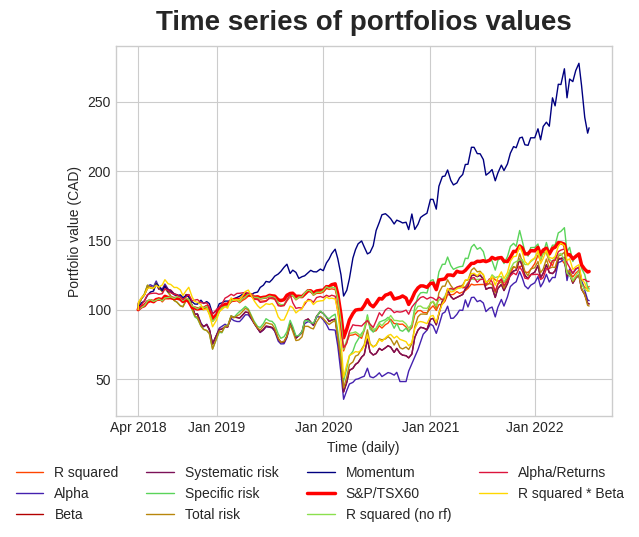

In [78]:
time_series_plot(df_portfolios_values, 'Ret', my_labels, col_dict)

As we can see from the graph above, in the last years some portfolios had better performances than the one which invests only in the market index, which performs worse. Now we will plot the two type of portfolios values in two different graph.  

### Regression portfolios

In [79]:
regression_label = ['R squared', 'R squared (no rf)', 'Alpha', 'Beta','S&P/TSX60']

In [80]:
reg_col_dict = dict()
for key in ['r_squared', 'r_squared_not_rm', 'alpha', 'beta','S&P/TSX 60 (189646)']:
  reg_col_dict[key] = col_dict[key]

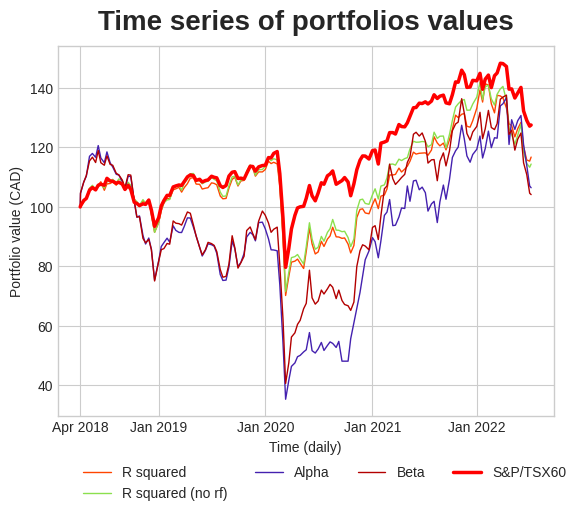

In [83]:
time_series_plot(df_portfolios_values[['r_squared', 'r_squared_not_rm', 'alpha', 'beta','S&P/TSX 60 (189646)']], 'Ret', regression_label, reg_col_dict)

### Returns portfolios

In [84]:
returns_label = ['Momentum','S&P/TSX60']

In [85]:
ret_col_dict = dict()
for key in ['momentum', 'S&P/TSX 60 (189646)']:
  ret_col_dict[key] = col_dict[key]

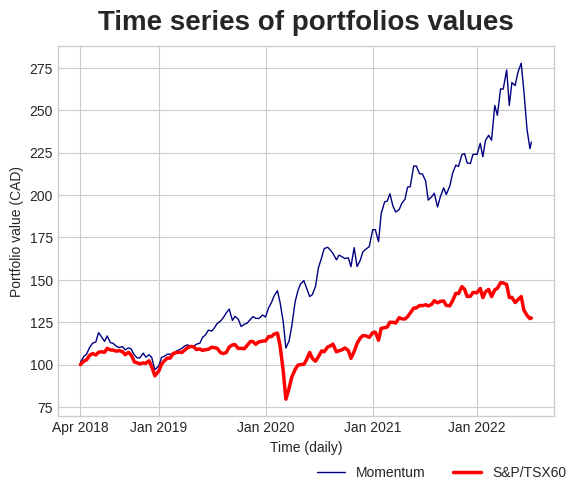

In [86]:
time_series_plot(df_portfolios_values[['momentum', 'S&P/TSX 60 (189646)']], 'Ret', returns_label, ret_col_dict )

### Risk portfolios

In [87]:
risk_col_dict = dict()
for key in ['systematic_risk', 'specific_risk', 'total_risk', 'S&P/TSX 60 (189646)']:
  risk_col_dict[key] = col_dict[key]

In [88]:
risk_label = ['Systematic risk', 'Specific risk', 'Total risk','S&P/TSX60']

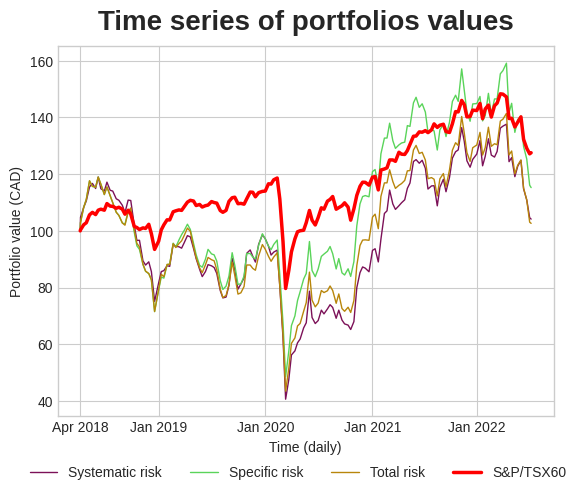

In [89]:
time_series_plot(df_portfolios_values[['systematic_risk', 'specific_risk', 'total_risk', 'S&P/TSX 60 (189646)']], 
                 'Ret', 
                 risk_label,
                 risk_col_dict)

### Combine portfolios

In [90]:
combine_label = ['Alpha/Returns', 'R squared * Beta', 'r_squared', 'alpha', 'beta', 'S&P/TSX60']

In [91]:
comb_col_dict = dict()
for key in ['ratio_alpha_ret', 'r_squared_beta', 'r_squared', 'alpha', 'beta', 'S&P/TSX 60 (189646)']:
  comb_col_dict[key] = col_dict[key]

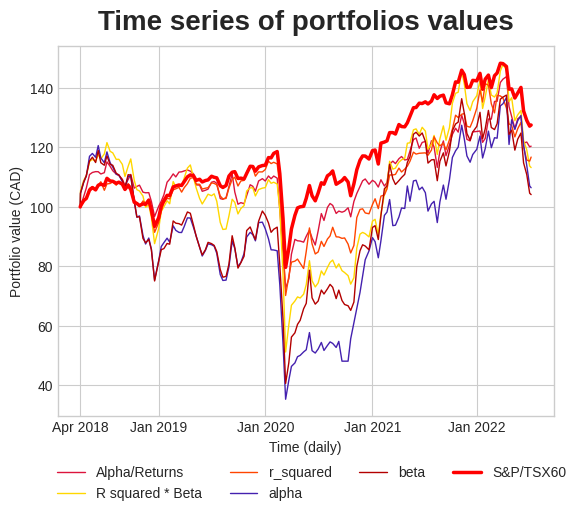

In [92]:
time_series_plot(df_portfolios_values[['ratio_alpha_ret', 'r_squared_beta', 'r_squared', 'alpha', 'beta', 'S&P/TSX 60 (189646)']], 
                 'Ret',
                 combine_label,
                 comb_col_dict)

## Portfolios volatility

We want to compute the annual volatility for each portfolio. In order to do it, we will determine the weekly volatility of each portfolio and then we'll approximate the annual volatility as:

$$σ_A = σ_W * √52$$

In [94]:
def weekly_volatility(assets_data_weekly):
  risk = 0

  corr_matrix = dict()
  for key1 in assets_data_weekly.keys():
    for key2 in assets_data_weekly.keys():
      i = min(len(assets_data_weekly[key1]),len(assets_data_weekly[key2]))
      corr_matrix[(key1,key2)] = np.corrcoef(assets_data_weekly[key1][:i], assets_data_weekly[key2][:i])[0,1]
 
  
  volatility = dict()
  for key in assets_data_weekly.keys():
    volatility[key] = np.std(assets_data_weekly[key])

  if len(assets_data_weekly.keys()) != 0:
    weight = 1/len(assets_data_weekly.keys())

    for key in corr_matrix.keys():
      if key[0] == key[1]:
        risk = risk + volatility[key[0]]*volatility[key[1]]*corr_matrix[key] 
      else:
        risk = risk + 2*volatility[key[0]]*volatility[key[1]]*corr_matrix[key] 

    return weight*np.sqrt(risk)

  else:
    return 0    

In [95]:
def portfolio_weekly_volatility(portfolio, window_size):
  portfolios_compositions_weekly_volatility = dict()

  for dt in portfolio.keys():
    # we compute the index of the final date
    final_index_date = df_log_Returns_weekly.index[df_log_Returns_weekly['Date'] == dt].tolist()[0]

    # we compute the index of the initial date 
    # (180 days before 'date')
    initial_index_date = df_log_Returns_weekly.index[df_log_Returns_weekly['Date'] == dt].tolist()[0] + int(window_size/7) 

    assets_volatility = dict()
    for asset in portfolio[dt]:
      assets_volatility[asset[0]] = df_log_Returns_weekly[asset[0]].iloc[final_index_date:initial_index_date]

    portfolios_compositions_weekly_volatility[dt] = weekly_volatility(assets_volatility)

  return portfolios_compositions_weekly_volatility

In [96]:
def portfolio_annual_volatility(portfolios_compositions_weekly_volatility):
  portfolios_compositions_annual_volatility = dict()

  for date in portfolios_compositions_weekly_volatility.keys():
    portfolios_compositions_annual_volatility[date] = portfolios_compositions_weekly_volatility[date]*np.sqrt(52)

  return portfolios_compositions_annual_volatility

We compute the weekly volatility for each composition of each portfolio.

In [97]:
portfolios_weekly_volatility = dict()

In [98]:
for key in portfolios.keys():
  portfolios_weekly_volatility[key] = portfolio_weekly_volatility(portfolios[key], 180)

We compute the estimation of annual volatility for each composition of each portfolio.

In [99]:
portfolios_annual_volatility = dict()

In [100]:
for key in portfolios.keys():
  portfolios_annual_volatility[key] = portfolio_annual_volatility(portfolios_weekly_volatility[key])

In [101]:
df_portfolios_volatility = pd.DataFrame(index = list(portfolios_annual_volatility['alpha'].keys()), columns = list(portfolios_annual_volatility.keys()))

for key in portfolios_annual_volatility.keys():
  df_portfolios_volatility[key] = list(portfolios_annual_volatility[key].values())

In [102]:
# Select the style of the plot
plt.style.use(plt.style.available[24])

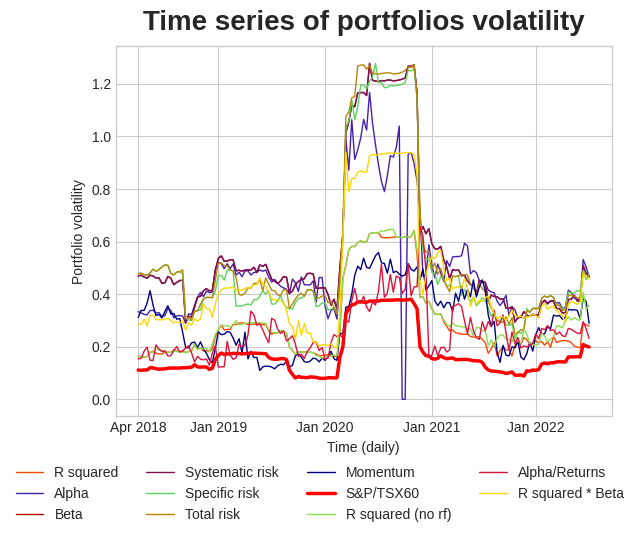

In [103]:
time_series_plot(df_portfolios_volatility, 'Vol', my_labels, col_dict)

### Regression portfolios

In [104]:
regression_label = ['R squared', 'R squared (no rf)', 'Alpha', 'Beta','S&P/TSX60']

In [105]:
reg_col_dict = dict()
for key in ['r_squared', 'r_squared_not_rm', 'alpha', 'beta','S&P/TSX 60 (189646)']:
  reg_col_dict[key] = col_dict[key]

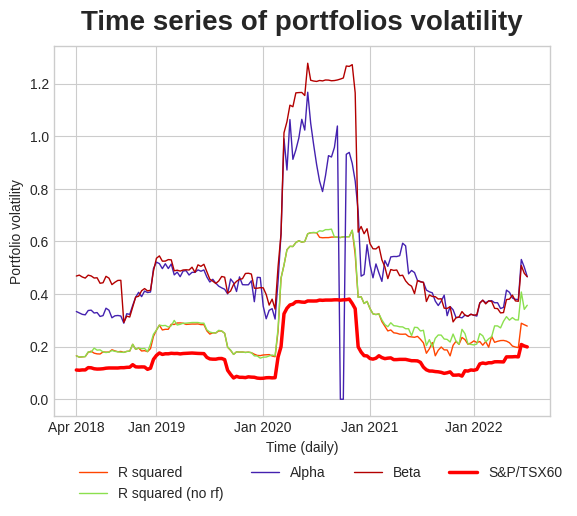

In [106]:
time_series_plot(df_portfolios_volatility[['r_squared', 'r_squared_not_rm', 'alpha', 'beta','S&P/TSX 60 (189646)']], 'Vol', regression_label, reg_col_dict)

### Returns portfolios

In [116]:
returns_label = ['Momentum','S&P/TSX60']

In [117]:
ret_col_dict = dict()
for key in ['momentum', 'S&P/TSX 60 (189646)']:
  ret_col_dict[key] = col_dict[key]

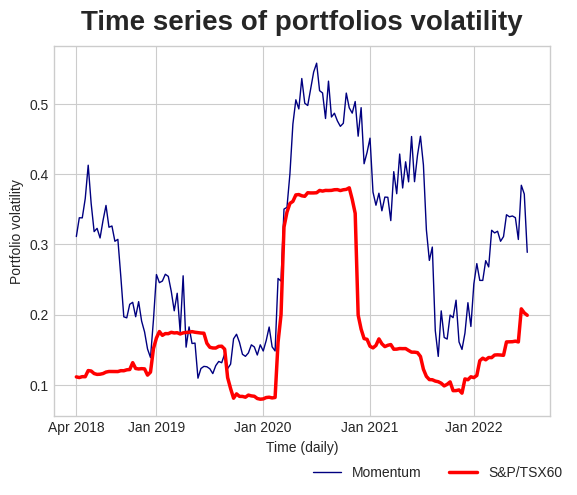

In [118]:
time_series_plot(df_portfolios_volatility[['momentum', 'S&P/TSX 60 (189646)']], 
                 'Vol', 
                 returns_label, 
                 ret_col_dict )

### Risk portfolios

In [119]:
risk_col_dict = dict()
for key in ['systematic_risk', 'specific_risk', 'total_risk', 'S&P/TSX 60 (189646)']:
  risk_col_dict[key] = col_dict[key]

In [120]:
risk_label = ['Systematic risk', 'Specific risk', 'Total risk','S&P/TSX60']

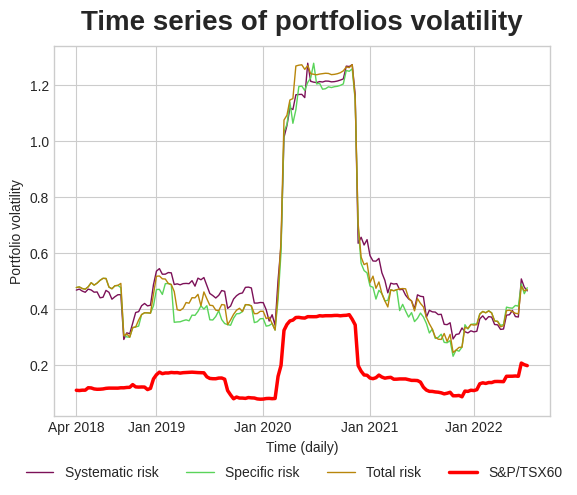

In [121]:
time_series_plot(df_portfolios_volatility[['systematic_risk', 'specific_risk', 'total_risk', 'S&P/TSX 60 (189646)']], 
                 'Vol', 
                 risk_label,
                 risk_col_dict)

### Combine portfolios

In [122]:
combine_label = ['Alpha/Returns', 'R squared * Beta','S&P/TSX60']

In [123]:
comb_col_dict = dict()
for key in ['ratio_alpha_ret', 'r_squared_beta', 'S&P/TSX 60 (189646)']:
  comb_col_dict[key] = col_dict[key]

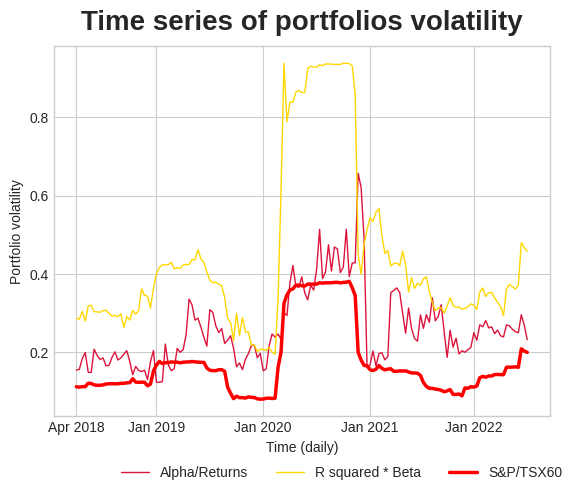

In [124]:
time_series_plot(df_portfolios_volatility[['ratio_alpha_ret', 'r_squared_beta', 'S&P/TSX 60 (189646)']], 
                 'Vol',
                 combine_label,
                 comb_col_dict)

## Annual estimations

 ### Return

Let's compute the annual return for each portfolio.

In [125]:
def portfolio_total_average_annual_log_returns(average_weekly_returns):
  return np.mean(list(average_weekly_returns.values()))*52

So the annual portfolio return will be:

In [126]:
portfolios_total_average_annual_log_return = dict()

In [127]:
for key in portfolios_weekly_returns.keys():
  portfolios_total_average_annual_log_return[key] = portfolio_total_average_annual_log_returns(portfolios_weekly_returns[key])

In [128]:
portfolios_total_average_annual_log_return

{'S&P/TSX 60 (189646)': 0.08270965674458775,
 'alpha': 0.02128057186261177,
 'beta': 0.01382159764737248,
 'momentum': 0.2848784198139639,
 'r_squared': 0.05270394302677122,
 'r_squared_beta': 0.04226035440224699,
 'r_squared_not_rm': 0.04577627455789013,
 'ratio_alpha_ret': 0.06321879586774634,
 'specific_risk': 0.048279017533284285,
 'systematic_risk': 0.01382159764737248,
 'total_risk': 0.00885863889311182}

### Volatility

In [129]:
def portfolio_annual_average_volatility(portfolios_compositions_weekly_volatility):
  return np.mean(list(portfolios_compositions_weekly_volatility.values()))*np.sqrt(52)

In [130]:
portfolios_weekly_volatility = dict()

In [131]:
for key in portfolios.keys():
  portfolios_weekly_volatility[key] = portfolio_weekly_volatility(portfolios[key],180)

In [132]:
portfolios_annual_average_volatility = dict()

In [133]:
for key in portfolios.keys():
  portfolios_annual_average_volatility[key] = portfolio_annual_average_volatility(portfolios_weekly_volatility[key])

In [134]:
portfolios_annual_average_volatility

{'S&P/TSX 60 (189646)': 0.17243797937415567,
 'alpha': 0.49366351089026744,
 'beta': 0.5628699976276448,
 'momentum': 0.2960801244127644,
 'r_squared': 0.28980195879374354,
 'r_squared_beta': 0.4447753213831925,
 'r_squared_not_rm': 0.3041298105487557,
 'ratio_alpha_ret': 0.25941684320280933,
 'specific_risk': 0.527794839781798,
 'systematic_risk': 0.5628699976276448,
 'total_risk': 0.5487716455149925}

## Portfolios efficiency

In [141]:
portfolio_efficiency = dict()

In [142]:
for key in portfolios_total_average_annual_log_return:
  portfolio_efficiency[key] = portfolios_total_average_annual_log_return[key]/portfolios_annual_average_volatility[key]

In [143]:
portfolio_efficiency

{'S&P/TSX 60 (189646)': 0.47964872381811235,
 'alpha': 0.043107443416740714,
 'beta': 0.02455557714148388,
 'momentum': 0.9621666445155088,
 'r_squared': 0.18186192821519684,
 'r_squared_beta': 0.09501506124670513,
 'r_squared_not_rm': 0.15051557910516514,
 'ratio_alpha_ret': 0.24369580281386186,
 'specific_risk': 0.09147307607865945,
 'systematic_risk': 0.02455557714148388,
 'total_risk': 0.016142668750311374}

In [144]:
import seaborn as sns

In [145]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

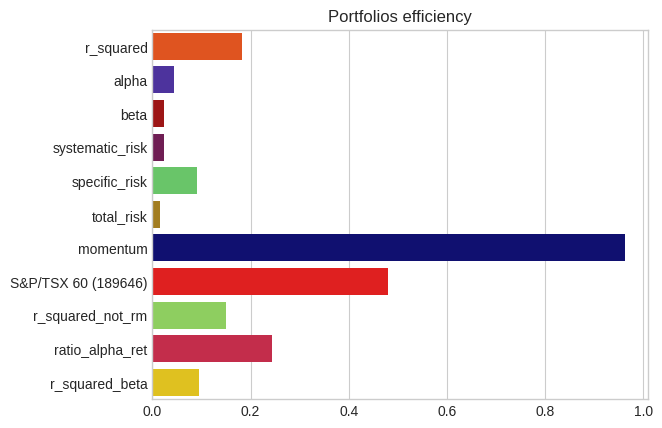

In [146]:
sns.barplot(x=list(portfolio_efficiency.values()), y=list(portfolio_efficiency.keys()), orient='h', 
            palette = col_dict)
plt.title('Portfolios efficiency')
plt.show()